## ĐỒ ÁN CUỐI KỲ - CSC17104: LẬP TRÌNH KHOA HỌC DỮ LIỆU
### TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐHQG-HCM
#### Khoa Công nghệ Thông tin

**Tên đề tài:** Phân tích Xu hướng Âm nhạc Toàn cầu trên Spotify (2009-2025)
**Bộ dữ liệu:** Spotify Global Music Dataset 2009-2025

**Danh sách thành viên nhóm:**
1. [MSSV] - [Họ và Tên]
2. [MSSV] - [Họ và Tên]
3. [MSSV] - [Họ và Tên]

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cấu hình hiển thị biểu đồ và pandas
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## 1. Thu thập dữ liệu (Data Collection)

### Tổng quan về bộ dữ liệu
* **Chủ đề:** Bộ dữ liệu chứa các thống kê âm thanh của các bài hát hàng đầu trên Spotify. Nó phản ánh sự phát triển của xu hướng âm nhạc, các đặc trưng âm thanh (như độ sôi động, năng lượng) và độ phổ biến qua các năm.
* **Ngữ cảnh thực tế:** Dữ liệu đại diện cho hành vi tiêu thụ âm nhạc toàn cầu và đặc điểm âm học của các bài hát thịnh hành trong hơn 15 năm qua.

### Nguồn gốc
* **Nền tảng:** Kaggle
* **URL:** https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025
* **Tác giả:** Warda Bilal

### Giấy phép & Sử dụng
* **Giấy phép:** (Kiểm tra lại trên Kaggle, thường là Apache 2.0 hoặc CC0).
* **Quyền sử dụng:** Được phép sử dụng cho mục đích giáo dục trong môn học này.

### Tại sao chọn dữ liệu này?
* Âm nhạc là chủ đề phổ biến và dễ tiếp cận.
* Bộ dữ liệu có sự kết hợp tốt giữa dữ liệu số (đặc trưng âm thanh) và dữ liệu phân loại (nghệ sĩ, thể loại).
* Cho phép thực hiện các bài toán Machine Learning thú vị, ví dụ như dự đoán độ "hot" của một bài hát dựa trên giai điệu.

In [2]:

try:
    df = pd.read_csv('spotify_data clean.csv')
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Không tìm thấy file. Vui lòng upload dataset và kiểm tra lại đường dẫn.")

# Hiển thị 5 dòng đầu tiên


Đã tải dữ liệu thành công!




### 2.1 Tổng quan về Bộ dữ liệu
1. Thông tin Cơ bản
+ Bộ dữ liệu của bạn có bao nhiêu hàng?
+ Bộ dữ liệu của bạn có bao nhiêu cột?
+ Mỗi hàng đại diện cho điều gì? (ví dụ: một khách hàng, một giao dịch, một ngày)
+ Kích thước tổng thể của bộ dữ liệu là bao nhiêu?
2. Tính Toàn vẹn của Dữ liệu
+ Có hàng nào bị trùng lặp không? Nếu có, là bao nhiêu?
+ Các bản sao nên được giữ lại hay loại bỏ? (Giải thích quyết định của bạn)
+ Tất cả các hàng có đầy đủ không, hay có một số hàng hoàn toàn trống?

1. Thông tin cơ bản 

In [3]:
nrows,ncolumns=df.shape
print(f"So dong: {nrows}, So cot: {ncolumns}")
df.head()

So dong: 8582, So cot: 15


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


- Mỗi dòng biểu thị thông tin của một bài hát bao gồm tên bài hát, tên tác giả, id bài hát,...

In [5]:
import os
file_path="spotify_data clean.csv"
size_bytes=os.path.getsize(file_path)
size_kb= size_bytes/(1024)
print(f"Kich thuoc du lieu: {size_kb:.2f} KB")

Kich thuoc du lieu: 1385.89 KB


In [8]:
# Kiem tra duplicate
dup_count=df.duplicated().sum()
print(f"So dong trung: {dup_count}")
df = df.replace(r'^\s*$', pd.NA, regex=True)
empty_rows = df.isna().all(axis=1).sum()
print(f"So dong trong: {empty_rows}")

So dong trung: 0
So dong trong: 0


Theo kết quả ở trên thì chúng ta thấy rằng không có dòng nào bị trống hay bị trùng.

### 2.3 Phân tích Cột Phân loại (Categorical Columns)

In [10]:
df = df.replace(['-', '–', 'N/A', 'null'], np.nan)
cat_cols= df.select_dtypes(include=['object']).columns
print(f"Các cột sẽ được phân tích: {list(cat_cols)}")


Các cột sẽ được phân tích: ['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_id', 'album_name', 'album_release_date', 'album_type']


In [13]:
print("=== PHÂN PHỐI GIÁ TRỊ (VALUE DISTRIBUTION) ===")

for col in cat_cols:
    print(f"\n🔵 Cột: {col}")
    # Số lượng giá trị riêng biệt
    n_unique = df[col].nunique()
    # Giá trị phổ biến nhất
    top_val = df[col].mode()[0]
    freq = df[col].value_counts().iloc[0]
    pct = (freq / len(df)) * 100
    
    print(f"   - Unique values: {n_unique}")
    print(f"   - Most frequent: '{top_val}' (Xuất hiện {freq} lần - Chiếm {pct:.1f}%)")
    

=== PHÂN PHỐI GIÁ TRỊ (VALUE DISTRIBUTION) ===

🔵 Cột: track_id
   - Unique values: 8582
   - Most frequent: '003vvx7Niy0yvhvHt4a68B' (Xuất hiện 1 lần - Chiếm 0.0%)

🔵 Cột: track_name
   - Unique values: 7462
   - Most frequent: 'Flowers' (Xuất hiện 8 lần - Chiếm 0.1%)

🔵 Cột: artist_name
   - Unique values: 2546
   - Most frequent: 'Taylor Swift' (Xuất hiện 324 lần - Chiếm 3.8%)

🔵 Cột: artist_genres
   - Unique values: 661
   - Most frequent: 'soundtrack' (Xuất hiện 345 lần - Chiếm 4.0%)

🔵 Cột: album_id
   - Unique values: 5205
   - Most frequent: '3FFGbUutKWN1c4f0CJR4Uh' (Xuất hiện 70 lần - Chiếm 0.8%)

🔵 Cột: album_name
   - Unique values: 4870
   - Most frequent: 'Nevermind (Super Deluxe Edition)' (Xuất hiện 70 lần - Chiếm 0.8%)

🔵 Cột: album_release_date
   - Unique values: 2384
   - Most frequent: '2010-01-01' (Xuất hiện 76 lần - Chiếm 0.9%)

🔵 Cột: album_type
   - Unique values: 3
   - Most frequent: 'album' (Xuất hiện 5856 lần - Chiếm 68.2%)


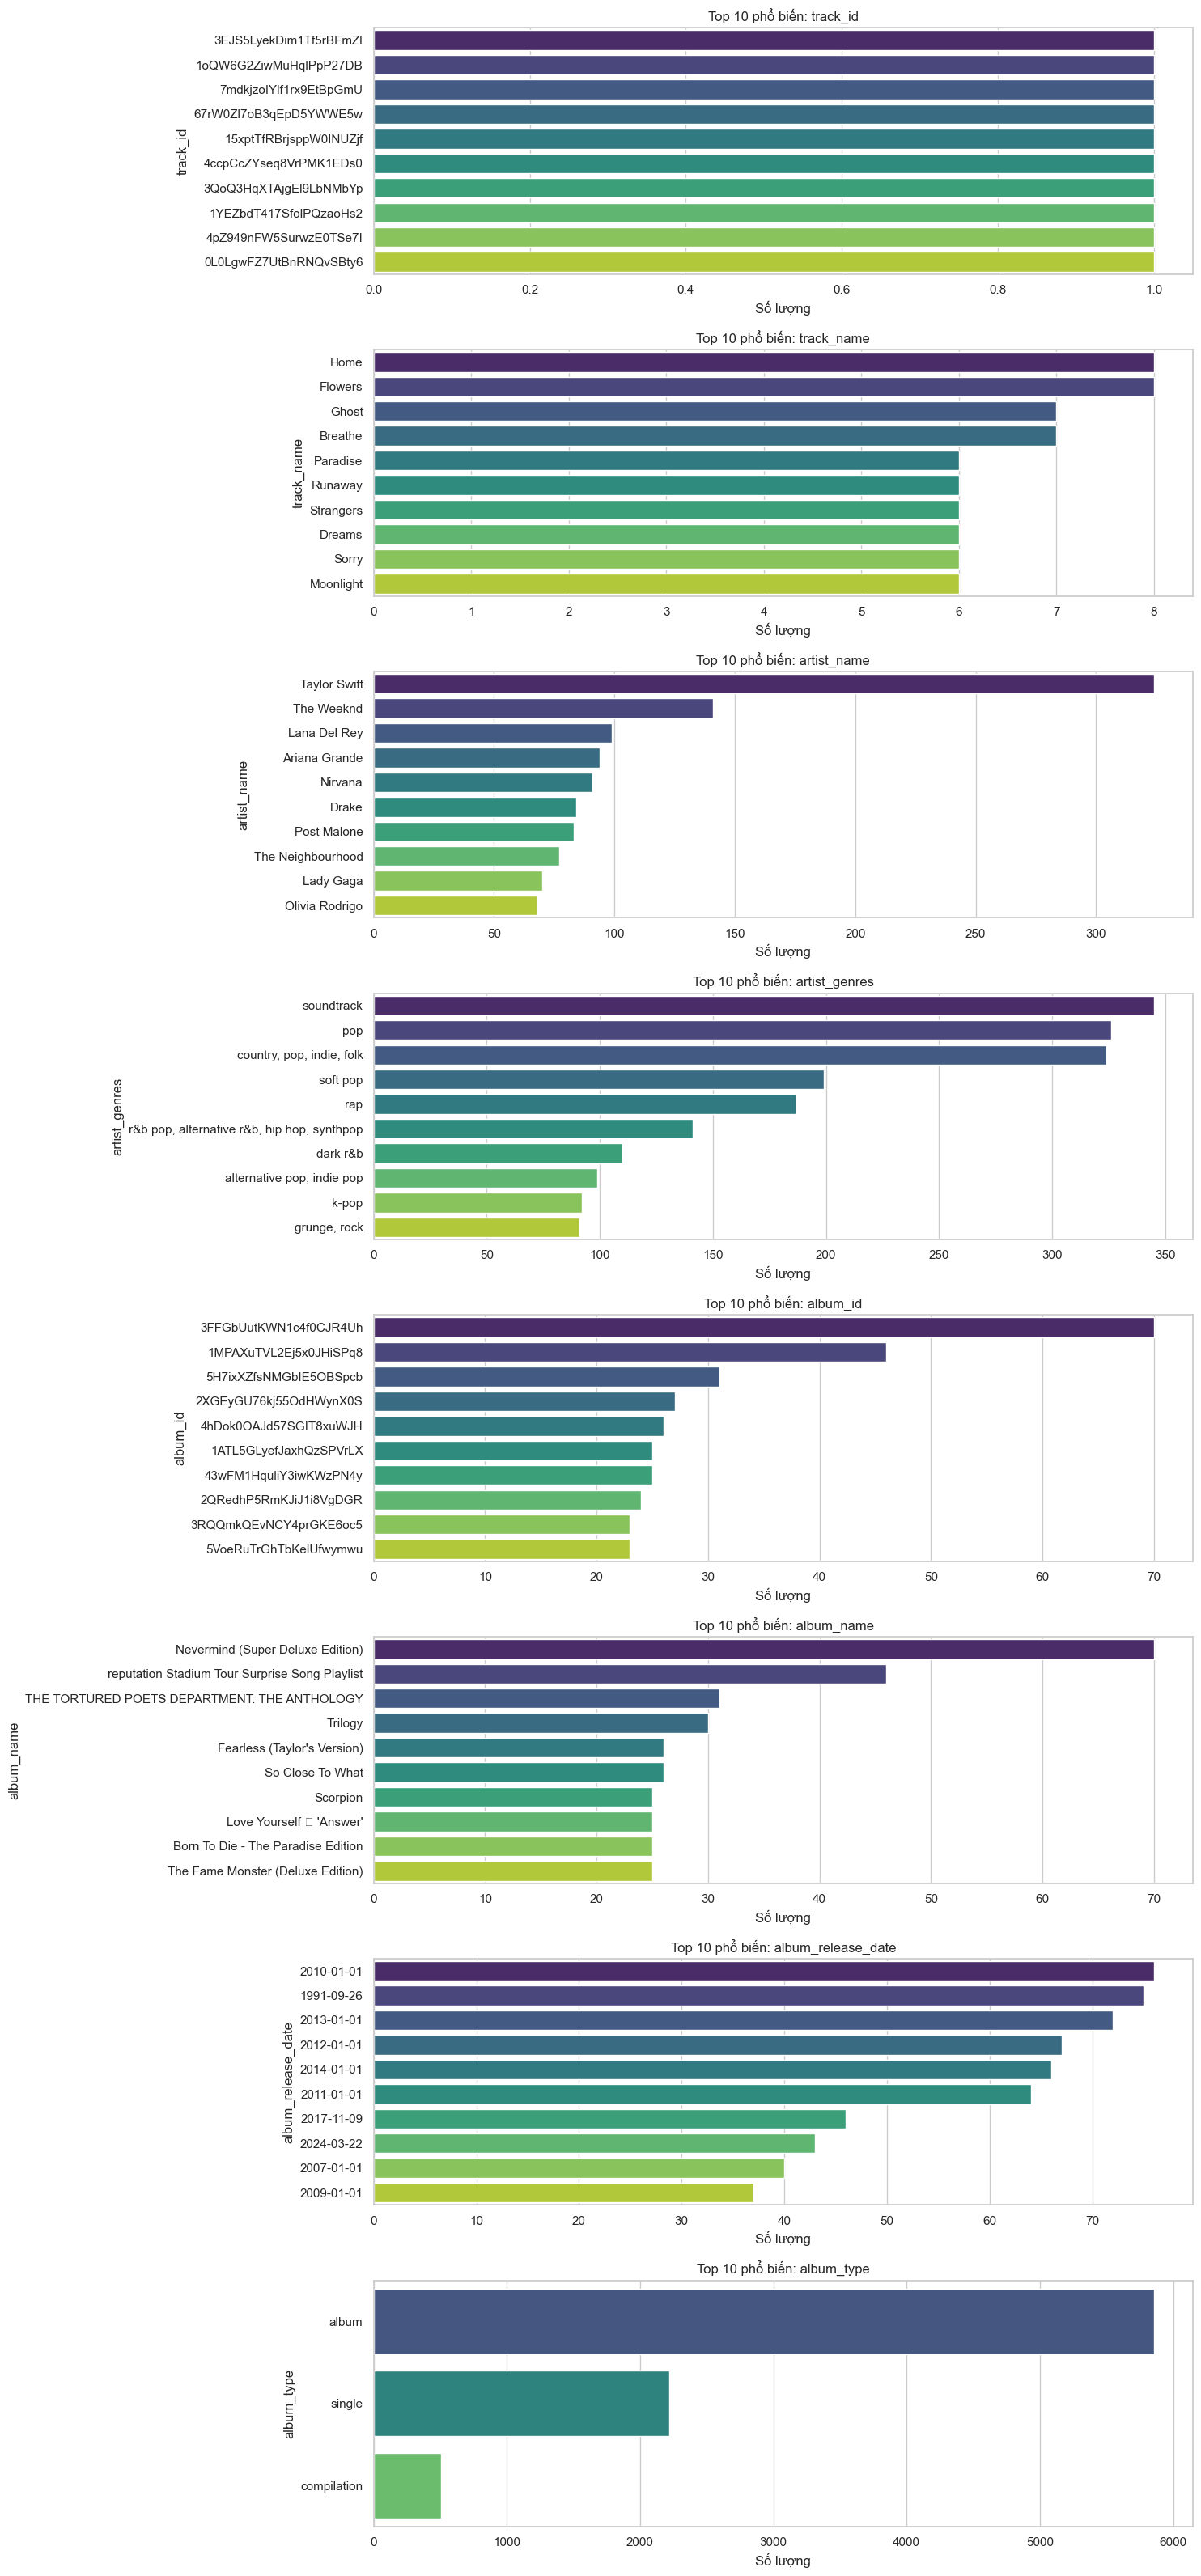

In [14]:
# Chỉnh kích thước tổng thể
plt.figure(figsize=(15, 4 * len(cat_cols))) # Tự động dài ra theo số lượng cột

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i) # Tạo ô vẽ thứ i
    
    # Chỉ lấy Top 10 để vẽ cho đẹp
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(y=col, data=df, order=top_10, palette='viridis')
    
    plt.title(f'Top 10 phổ biến: {col}')
    plt.xlabel('Số lượng')

plt.tight_layout()
plt.show()

2. Chất lượng dữ liệu 

In [15]:
# Tạo một list để chứa kết quả
quality_data = []

for col in cat_cols:
    # 1. Tính Missing
    miss_count = df[col].isnull().sum()
    miss_pct = (miss_count / len(df)) * 100
    
    # 2. Kiểm tra Nhất quán (Inconsistency)
    n_orig = df[col].nunique()
    n_lower = df[col].str.lower().nunique()
    is_inconsistent = "CÓ LỖI" if n_orig != n_lower else "Ổn"
    
    # 3. Giá trị hiếm (<= 2 lần)
    rare_count = (df[col].value_counts() <= 2).sum()
    
    # Lưu vào list
    quality_data.append([col, miss_count, f"{miss_pct:.1f}%", is_inconsistent, rare_count])

# Tạo bảng DataFrame báo cáo
quality_df = pd.DataFrame(quality_data, columns=['Column', 'Missing Values', '% Missing', 'Inconsistency Check', 'Rare Values (<=2)'])

print("=== BẢNG ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU ===")
display(quality_df)

=== BẢNG ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU ===


,Column,Missing Values,% Missing,Inconsistency Check,Rare Values (<=2)
0,track_id,0,0.0%,Ổn,8582
1,track_name,0,0.0%,CÓ LỖI,7281
2,artist_name,4,0.0%,Ổn,1948
3,artist_genres,3361,39.2%,Ổn,434
4,album_id,0,0.0%,Ổn,4758
5,album_name,0,0.0%,CÓ LỖI,4361
6,album_release_date,0,0.0%,Ổn,1598
7,album_type,0,0.0%,Ổn,0
